# LIMPIEZA Y MANPULACIÓN DE  DUPLICADOS Y NULOS 

In [729]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [730]:
import matplotlib.pyplot as plt

In [732]:
# Este script es un ejemplo de cómo cargar un archivo CSV en un DataFrame de pandas
df_original = pd.read_csv("data.csv", index_col=0)

In [631]:
# ¿Qué variables hay en el dataframe?
df_original.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

In [632]:
# ¿Cuántas filas y columnas tiene el dataframe?
df_original.shape

(1678, 41)

## 0.  Eliminación de duplicado importante

In [733]:
# Aquí tenemos un dataframe limpio, a nivel sintáctico
df = pd.read_csv("cleaned_data.csv")  # o la ruta completa si está en una carpeta

In [634]:
columnas_utiles = ["employee_id", "employee_turnover", "business_travel_frequency", "distance_from_home_km", "education_level", "environmental_satisfaction_level", "gender", "job_involvement_level", "job_level", 
                   "job_satisfaction_level", "marital_status",  "num_companies_worked", "overtime_hours", "percent_salary_hike", "standard_work_hours", "stock_option_level",
                   "training_sessions_last_year", "years_at_company", "years_with_current_manager", "birth_year", "remote_work", "total_years_worked", "annual_salary", "work_life_balance",
]

df_filtrado = df[columnas_utiles]

In [635]:
df = df_filtrado.drop_duplicates(subset=["employee_id"], keep="first")

In [735]:
df

,age,employee_turnover,business_travel_frequency,daily_rate,distance_from_home_km,education_level,education_field,remove_column,employee_id,environmental_satisfaction_level,gender,hourly_rate,job_involvement_level,job_level,job_role,job_satisfaction_level,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,percent_salary_hike,relationship_satisfaction_level,stock_option_level,training_sessions_last_year,years_at_company,years_since_last_promotion,years_with_current_manager,birth_year,overtime_hours,performance_rating,standard_work_hours,total_years_worked,work_life_balance,same_as_monthly_income,annual_salary,remote_work
0,51,no,NaN,2015.72,6.0,3,NaN,1,1,1.0,female,NaN,3,5,research_director,3,NaN,16280.83,42330.17,7,NaN,13,3,0,5,20,15,15,1972,no,3.0,full_time,NaN,3.0,16280.83,195370.00,yes
1,52,no,NaN,2063.39,1.0,4,life_sciences,1,2,3.0,female,NaN,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,1,1,5,33,11,9,1971,none,3.0,none,34.0,3.0,NaN,199990.00,yes
2,42,no,travel_rarely,1984.25,4.0,2,technical_degree,1,3,3.0,female,NaN,3,5,manager,4,married,NaN,41669.33,1,NaN,11,4,0,3,22,11,15,1981,no,3.0,none,22.0,NaN,NaN,192320.00,yes
3,47,no,travel_rarely,1771.40,2.0,4,medical,1,4,1.0,male,NaN,3,4,research_director,3,married,14307.50,37199.50,3,NaN,19,2,2,2,20,5,6,1976,none,3.0,full_time,NaN,NaN,14307.50,171690.00,no
4,46,no,NaN,1582.77,3.0,3,technical_degree,1,5,1.0,male,NaN,4,4,sales_executive,1,divorced,12783.92,33238.20,2,NaN,12,4,1,5,19,2,8,1977,no,3.0,none,NaN,3.0,12783.92,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,no,NaN,488.94,NaN,3,medical,1,824,2.0,male,NaN,4,1,research_scientist,3,single,3949.17,10267.83,4,NaN,12,4,0,2,3,1,2,1980,none,3.0,none,NaN,3.0,3949.17,NaN,yes
1674,47,no,NaN,1973.98,26.0,4,NaN,1,1087,4.0,male,NaN,3,5,manager,3,married,15943.72,41453.67,3,NaN,11,3,1,2,5,1,0,1976,no,3.0,full_time,27.0,3.0,15943.72,191324.62,no
1675,29,no,travel_rarely,290.04,15.0,3,NaN,1,528,3.0,female,NaN,3,1,research_scientist,4,NaN,NaN,6090.75,1,NaN,19,1,0,1,6,1,5,1994,no,3.0,part_time,6.0,3.0,NaN,28111.13,no
1676,47,no,travel_rarely,1032.49,4.0,3,life_sciences,1,76,3.0,male,NaN,2,3,manufacturing_director,2,divorced,8339.32,21682.23,8,NaN,12,3,1,4,22,14,10,1976,yes,NaN,part_time,NaN,3.0,8339.32,100071.84,yes


In [736]:
print(df_original.shape) 
print(df.shape)  

(1678, 41)
(1678, 37)


## 1. Conversión de Tipos de Datos para Posibles Datos Nulos

In [737]:
# Observamos la variable "distancefromhome"
df["distance_from_home_km"].unique()

array([ 6.,  1.,  4.,  2.,  3., 22., 25.,  9.,  7., 23., 10., 12., 14.,
       nan, 15.,  8., 28.,  5., 16., 26., 24., 29., 17., 21., 20., 18.,
       11., 13., 19., 27.])

In [738]:
# ¿Cuántos valores nulos tiene la variable "distancefromhome"?
df["distance_from_home_km"].isnull().sum()


202

In [739]:
# Queremos ver si debemos cambiar los valores negativos a valor absoluto. Para ello calculámos el porcentaje de valores negativos respecto al total de filas
# Primero, asegurémonos de que la columna "distancefromhome" es numérica
df["distance_from_home_km"] = pd.to_numeric(df["distance_from_home_km"], errors="coerce")

In [740]:
# Ahora calculamos el porcentaje de valores negativos
porcentaje_negativos = (df["distance_from_home_km"] < 0).sum() / len(df) * 100
print(f"Porcentaje de valores negativos: {porcentaje_negativos}%")
# Si el porcentaje es muy bajo, podemos considerar que no es necesario cambiar los valores negativos a valor absoluto. 
# En este caso, el porcentaje es 12.04%, ni es muy bajo, ni muy alto.
# Por lo que podemos decidir cambiar los valores negativos a valor absoluto

Porcentaje de valores negativos: 0.0%


In [741]:
# Verificamos si la columna "distance_from_home_km" está en el DataFrame
if "distance_from_home_km" in df.columns:
	# Convertimos la columna "distance_from_home_km" a valores absolutos
	df["distance_from_home_km"] = df_filtrado["distance_from_home_km"].abs()

	# Ahora, volvemos a calcular el porcentaje de valores negativos
	porcentaje_negativos = (df["distance_from_home_km"] < 0).sum() / len(df) * 100
	print(f"Porcentaje de valores negativos después de cambiar a valor absoluto: {porcentaje_negativos}%")
else:
	print("La columna 'distance_from_home_km' no está presente en el DataFrame.")

Porcentaje de valores negativos después de cambiar a valor absoluto: 0.0%


In [742]:
# Comprobamos que no hay valores negativos
df["distance_from_home_km"].unique()

array([ 6.,  1.,  4.,  2.,  3., 22., 25.,  9.,  7., 23., 10., 12., 14.,
       nan, 15.,  8., 28.,  5., 16., 26., 24., 29., 17., 21., 20., 18.,
       11., 13., 19., 27.])

In [743]:
# Ahora, vamos a comprobar si hay valores nulos en el dataframe
df.isnull().sum().sort_values(ascending=False)

over_18                             1678
hourly_rate                         1267
business_travel_frequency            801
education_field                      774
marital_status                       675
total_years_worked                   549
same_as_monthly_income               489
monthly_income                       489
annual_salary                        285
distance_from_home_km                202
performance_rating                   200
work_life_balance                    114
environmental_satisfaction_level     102
years_at_company                       0
years_since_last_promotion             0
age                                    0
years_with_current_manager             0
birth_year                             0
overtime_hours                         0
stock_option_level                     0
standard_work_hours                    0
training_sessions_last_year            0
monthly_rate                           0
relationship_satisfaction_level        0
percent_salary_h

**Analizaremos duplicados e información irrelevante de las variables, si apenas existen datos no nulos se elimina la variable, si no, hacemos las modificaciones necesarias para darle coherencia a la información.**

In [744]:
# Realizamos un análisis de los valores nulos
# Primero, vamos a ver el las variables y por tanto columnas eliminadas 



1. "dailyrate": Aunque tiene 0% de nulos, es preciso eliminarla ya que no nos interesa la información que aporta de pago diario teniendo la variable "salary" anual. Creemos que esta información no era relevante ya que no conocemos si los horarios de los empleados son regulares o no.

2. "education_field": Contiene 774 (46,13%) valores vacíos. , casi la mitad, por lo que se procede a su eliminación. Además, consideramos que no es una información de interés pues con la variable "educationlevel" obtenemos unos datos más precisos sobre la formación.

3. "employeenumber": contiene 0 datos nulos pero hemos observado que no es relevante pues sólo posee un dato, 1. 

4. "numberchildren": se elimina, pues tiene un 100% de nulos.

5. "over18": se elimina, 938 (55,90%) valores vacíos, información redundante.

6. "age": aunque no tiene nulos decidimos sustituirla por la variable "birthyear" la cual es más precisa indicando el año de nacimiento.

7. "hourlyrate": el pago por horas no es importante si sabemos el pago del salario anual, además contiene más de 70% de datos nulos.

8. "monthlyincome": el salario mensual tiene un 29,14% de nulos. Eliminaremos esta variable porque nos basta con saber el salario anual de los empleados.

9. "monthlyrate": pago mensual, no tiene nulos pero es una información no útil.

10. "performancerating": vemos que esta variable tiene una información muy homogénea, aunque la cantidad de nulos es baja, hemos valorado que esta variable no aporta datos significativos para el análisis pues aunque la valoración del desempeño es del 1 al 4, todos las respuestas son "3" o "4". Creemos que hay un sesgo de autopercepción.

11. "worklifebalance": Tenemos casi un 7% de nulos, no eliminaremos la variable ya que se puede relacionar con otras. Como el porcentaje de nulos es bajo se sustituirán por la mediana de los valores del 1 al 4.

12. "sameasmonthlyincome":con casi 30% de nulos, es una columna duplicada de monthlyincome, por lo que se elimina.'''

13. "years_current_role": 1643 (97,91%) valores vacíos. Se elimina.

14. "department": 1366 (81,41%) valores vacíos. Se elimina.

15. "jobrole": Consideramos que aunque no tiene nulos no ofrece una información relevanta, sino confusa, ya tenemos la variable de jerarquía en sus sustitución ("job_level")

In [745]:
columnas_utiles = ["employee_id", "employee_turnover", "business_travel_frequency", "distance_from_home_km", "education_level", "environmental_satisfaction_level", "gender", "job_involvement_level", "job_level", 
                   "job_satisfaction_level", "marital_status",  "num_companies_worked", "overtime_hours", "percent_salary_hike", "standard_work_hours", "stock_option_level",
                   "training_sessions_last_year", "years_at_company", "years_with_current_manager", "birth_year", "remote_work", "total_years_worked", "annual_salary", "work_life_balance",
]

In [746]:
# Hemos creado una lista con las columnas en las que no es claro que podrían ser eliminadas
listacolumnas_posibleeliminacion =  ["employee_id", "work_life_balance", "business_travel_frequency", "overtime_hours", "marital_status", "total_years_worked", "standard_work_hours", "annual_salary"]

In [747]:
df

,age,employee_turnover,business_travel_frequency,daily_rate,distance_from_home_km,education_level,education_field,remove_column,employee_id,environmental_satisfaction_level,gender,hourly_rate,job_involvement_level,job_level,job_role,job_satisfaction_level,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,percent_salary_hike,relationship_satisfaction_level,stock_option_level,training_sessions_last_year,years_at_company,years_since_last_promotion,years_with_current_manager,birth_year,overtime_hours,performance_rating,standard_work_hours,total_years_worked,work_life_balance,same_as_monthly_income,annual_salary,remote_work
0,51,no,NaN,2015.72,6.0,3,NaN,1,1,1.0,female,NaN,3,5,research_director,3,NaN,16280.83,42330.17,7,NaN,13,3,0,5,20,15,15,1972,no,3.0,full_time,NaN,3.0,16280.83,195370.00,yes
1,52,no,NaN,2063.39,1.0,4,life_sciences,1,2,3.0,female,NaN,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,1,1,5,33,11,9,1971,none,3.0,none,34.0,3.0,NaN,199990.00,yes
2,42,no,travel_rarely,1984.25,4.0,2,technical_degree,1,3,3.0,female,NaN,3,5,manager,4,married,NaN,41669.33,1,NaN,11,4,0,3,22,11,15,1981,no,3.0,none,22.0,NaN,NaN,192320.00,yes
3,47,no,travel_rarely,1771.40,2.0,4,medical,1,4,1.0,male,NaN,3,4,research_director,3,married,14307.50,37199.50,3,NaN,19,2,2,2,20,5,6,1976,none,3.0,full_time,NaN,NaN,14307.50,171690.00,no
4,46,no,NaN,1582.77,3.0,3,technical_degree,1,5,1.0,male,NaN,4,4,sales_executive,1,divorced,12783.92,33238.20,2,NaN,12,4,1,5,19,2,8,1977,no,3.0,none,NaN,3.0,12783.92,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,no,NaN,488.94,NaN,3,medical,1,824,2.0,male,NaN,4,1,research_scientist,3,single,3949.17,10267.83,4,NaN,12,4,0,2,3,1,2,1980,none,3.0,none,NaN,3.0,3949.17,NaN,yes
1674,47,no,NaN,1973.98,26.0,4,NaN,1,1087,4.0,male,NaN,3,5,manager,3,married,15943.72,41453.67,3,NaN,11,3,1,2,5,1,0,1976,no,3.0,full_time,27.0,3.0,15943.72,191324.62,no
1675,29,no,travel_rarely,290.04,15.0,3,NaN,1,528,3.0,female,NaN,3,1,research_scientist,4,NaN,NaN,6090.75,1,NaN,19,1,0,1,6,1,5,1994,no,3.0,part_time,6.0,3.0,NaN,28111.13,no
1676,47,no,travel_rarely,1032.49,4.0,3,life_sciences,1,76,3.0,male,NaN,2,3,manufacturing_director,2,divorced,8339.32,21682.23,8,NaN,12,3,1,4,22,14,10,1976,yes,NaN,part_time,NaN,3.0,8339.32,100071.84,yes


In [748]:
# Ahora, vamos a calcular el porcentaje de valores nulos por columna
for col in listacolumnas_posibleeliminacion:
    porc_nulos = df[col].isnull().sum() / len(df) * 100
    print(f"La variable {col} tiene {porc_nulos:.2f}% de datos nulos")

La variable employee_id tiene 0.00% de datos nulos
La variable work_life_balance tiene 6.79% de datos nulos
La variable business_travel_frequency tiene 47.74% de datos nulos
La variable overtime_hours tiene 0.00% de datos nulos
La variable marital_status tiene 40.23% de datos nulos
La variable total_years_worked tiene 32.72% de datos nulos
La variable standard_work_hours tiene 0.00% de datos nulos
La variable annual_salary tiene 16.98% de datos nulos


In [749]:
'''2.'''""
# Para comprobar que el campo académico de estudios no influye en el rol del empleado
# Comprobamos los valores únicos de la variable "jobrole"
df_original["jobrole"].unique()


array([' resEArch DIREcToR ', ' ManAGeR ', ' ManaGER ', ...,
       ' sAlES ExECUTivE ', ' SaLes ExecUtIVe ',
       ' mAnUfactURInG DiRECTOr '], dtype=object)

In [750]:
# Realizamos una homegeneización de los nombres de los roles para evitar problemas de escritura y espacios en blanco
# Convertimos los nombres a minúsculas y eliminamos espacios en blanco al principio y al final de cada nombre
df_original["jobrole"] = df_original["jobrole"].astype(str).str.strip().str.lower()

In [751]:
# Vamos a agrupar ambas variables y ver si hay alguna relación entre ellas
df_studies = df_original.groupby(["jobrole", "educationfield", "joblevel"]).size().reset_index(name="Cantidad")


In [752]:
df_studies.apply(lambda x: x.astype(str).str.strip().str.lower())


,jobrole,educationfield,joblevel,Cantidad
0,healthcare representative,life sciences,2,24
1,healthcare representative,life sciences,3,12
2,healthcare representative,life sciences,4,3
3,healthcare representative,medical,2,23
4,healthcare representative,medical,3,13
...,...,...,...,...
89,sales representative,medical,1,9
90,sales representative,medical,2,2
91,sales representative,other,1,2
92,sales representative,technical degree,1,8


In [753]:
''' Resulta complicado observar una tendencia agrupando valores categóricos. Por lo que decidimos eliminar la variable "educationfield" y quedarnos con "educationlevel" que es más precisa.'''

' Resulta complicado observar una tendencia agrupando valores categóricos. Por lo que decidimos eliminar la variable "educationfield" y quedarnos con "educationlevel" que es más precisa.'

*IMPORTANTE*

**Toma de decisión en la eliminación de las siguientes 15 variables: "age", "dailyrate", "employeenumber", "numberchildren","yearsincurrentrole", "department", "roledepartment", "hourlyrate", "over_18", "educationfield", "education", "sameasmonthlyincome", "monthlyincome", "performancerating", "jobrole"**
________________________________________________________________________

In [754]:
df.columns

Index(['age', 'employee_turnover', 'business_travel_frequency', 'daily_rate',
       'distance_from_home_km', 'education_level', 'education_field',
       'remove_column', 'employee_id', 'environmental_satisfaction_level',
       'gender', 'hourly_rate', 'job_involvement_level', 'job_level',
       'job_role', 'job_satisfaction_level', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'over_18',
       'percent_salary_hike', 'relationship_satisfaction_level',
       'stock_option_level', 'training_sessions_last_year', 'years_at_company',
       'years_since_last_promotion', 'years_with_current_manager',
       'birth_year', 'overtime_hours', 'performance_rating',
       'standard_work_hours', 'total_years_worked', 'work_life_balance',
       'same_as_monthly_income', 'annual_salary', 'remote_work'],
      dtype='object')

In [755]:
df.head(3)

,age,employee_turnover,business_travel_frequency,daily_rate,distance_from_home_km,education_level,education_field,remove_column,employee_id,environmental_satisfaction_level,gender,hourly_rate,job_involvement_level,job_level,job_role,job_satisfaction_level,marital_status,monthly_income,monthly_rate,num_companies_worked,over_18,percent_salary_hike,relationship_satisfaction_level,stock_option_level,training_sessions_last_year,years_at_company,years_since_last_promotion,years_with_current_manager,birth_year,overtime_hours,performance_rating,standard_work_hours,total_years_worked,work_life_balance,same_as_monthly_income,annual_salary,remote_work
0,51,no,NaN,2015.72,6.0,3,NaN,1,1,1.0,female,NaN,3,5,research_director,3,NaN,16280.83,42330.17,7,NaN,13,3,0,5,20,15,15,1972,no,3.0,full_time,NaN,3.0,16280.83,195370.0,yes
1,52,no,NaN,2063.39,1.0,4,life_sciences,1,2,3.0,female,NaN,2,5,manager,3,NaN,NaN,43331.17,0,NaN,14,1,1,5,33,11,9,1971,none,3.0,none,34.0,3.0,NaN,199990.0,yes
2,42,no,travel_rarely,1984.25,4.0,2,technical_degree,1,3,3.0,female,NaN,3,5,manager,4,married,NaN,41669.33,1,NaN,11,4,0,3,22,11,15,1981,no,3.0,none,22.0,NaN,NaN,192320.0,yes


In [756]:
df.isnull().sum().sort_values(ascending=False)


over_18                             1678
hourly_rate                         1267
business_travel_frequency            801
education_field                      774
marital_status                       675
total_years_worked                   549
same_as_monthly_income               489
monthly_income                       489
annual_salary                        285
distance_from_home_km                202
performance_rating                   200
work_life_balance                    114
environmental_satisfaction_level     102
years_at_company                       0
years_since_last_promotion             0
age                                    0
years_with_current_manager             0
birth_year                             0
overtime_hours                         0
stock_option_level                     0
standard_work_hours                    0
training_sessions_last_year            0
monthly_rate                           0
relationship_satisfaction_level        0
percent_salary_h

In [757]:
# columnas con nulos: "business_travel_frequency", "overtime_hours", "marital_status", "standard_work_hours", "distance_from_home_km ", "environmental_satisfaction_level", "total_years_worked", "annual_salary", "work_life_balance"

In [758]:
# vemos de que tipo es cada columna que tiene nulos:

df[["business_travel_frequency", "overtime_hours", "marital_status", "standard_work_hours", "distance_from_home_km", "environmental_satisfaction_level", "total_years_worked", "annual_salary", "work_life_balance"]].dtypes

business_travel_frequency            object
overtime_hours                       object
marital_status                       object
standard_work_hours                  object
distance_from_home_km               float64
environmental_satisfaction_level    float64
total_years_worked                  float64
annual_salary                       float64
work_life_balance                   float64
dtype: object

**Aunque vemos una diferencia entre jornadas, consideramos que casi un 21% de nulos no pueden considerarse "part_time" o jornada parcial**

__________________________________________________________________
# Manipulación de Valores Nulos en:

## Variables categóricas: "business_travel_frequency", "work_life_balance", "standard_work_hours" 

In [759]:
# Saco los valores unicos de las columnas categoricas:

columnas_categoricas = [
    "business_travel_frequency", 
    "overtime_hours", 
    "marital_status",
    "standard_work_hours" 
]

for col in columnas_categoricas:
    print(f"Valores únicos en '{col}':")
    print(df[col].unique())
    print("\n")


Valores únicos en 'business_travel_frequency':
[nan 'travel_rarely' 'travel_frequently' 'non_travel']


Valores únicos en 'overtime_hours':
['no' 'none' 'yes']


Valores únicos en 'marital_status':
[nan 'married' 'divorced' 'single']


Valores únicos en 'standard_work_hours':
['full_time' 'none' 'part_time']




In [760]:
# sacamos el porcentaje de valores nulos de las columnas categoricas:

round((df[["business_travel_frequency", "overtime_hours","marital_status", "standard_work_hours" ]].isnull().sum() /len(df)) *100, 2)

# round((df_filtrado["overtime_hours"].isnull().sum() / df_filtrado.shape[0]) * 100, 2) - > tambien podemos hacerlo con shape

business_travel_frequency    47.74
overtime_hours                0.00
marital_status               40.23
standard_work_hours           0.00
dtype: float64

En las columnas "business_travel_frequency", "overtime_hours", "marital_status"  dejaremos los datos nulos como desconocidos ya que es un porcentaje de nulos excesivamente alto.
Sin embargo, de la columna standard_work_hours, analizaremos los valores de la columna para rellenar los datos nulos.

In [761]:
# estas columnas tienen mas de un 40% de valores nulos, los cuales los dejaremos como desconocido.
# para uno seria: df_filtrado["business_travel_frequency"] = df_filtrado["business_travel_frequency"].fillna("Unknown")

col_nulos_desconocido = [ "business_travel_frequency", "overtime_hours","marital_status"]

for columna in col_nulos_desconocido:
    df.loc[:, columna] = df[columna].fillna("unknown") 

# al ser una copia de otro DF, necesito usar .loc para filtrar sino panda no entiende donde tiene que hacer el cambio.
# df_filtrado.loc[:, columna] accede a todas las filas (:) de la columan y las modifica directamente en el Dataframe original.



In [762]:
# comprobamos si ya no tienen nulos: 

round((df[["business_travel_frequency", "overtime_hours","marital_status"]].isnull().sum() /len(df)) *100, 2)


business_travel_frequency    0.0
overtime_hours               0.0
marital_status               0.0
dtype: float64

**¿Qué hacemos con la variable "standardhours" o " tipo de jornada laboral", cuyos nulos son un 20,92%** Calculamos el porcentaje de cada valor

In [763]:
# ¿Cual es el porcentaje de cada valor unico?
df["standard_work_hours"].value_counts(normalize=True, dropna=False) * 100
# Normalizamos para que sea un porcentaje y no un conteo.
# con normalize = True, saca la proporcion, multiplico por 100 y tengo el porcentaje. 
# dropna = False para que incluya los valores nulos.

standard_work_hours
part_time    55.244338
full_time    23.837902
none         20.917759
Name: proportion, dtype: float64

In [764]:
# ¿Cual es el porcentaje de cada valor unico sin los nulos?
df["standard_work_hours"].describe().T

count          1678
unique            3
top       part_time
freq            927
Name: standard_work_hours, dtype: object

____________________________________________________________________
## Variables numéricas: "distance_from_home_km", "environmental_satisfaction_level", "total_years_worked", "annual_salary", "work_life_balance"


In [765]:
# Saco los valores unicos de las columnas numericas:

columnas_numericas = [
    "distance_from_home_km", 
    "total_years_worked", 
    "annual_salary",
    "work_life_balance",
    
]

for col in columnas_numericas:
    print(f"Valores únicos en '{col}':")
    print(df[col].unique())
    print("\n")

Valores únicos en 'distance_from_home_km':
[ 6.  1.  4.  2.  3. 22. 25.  9.  7. 23. 10. 12. 14. nan 15.  8. 28.  5.
 16. 26. 24. 29. 17. 21. 20. 18. 11. 13. 19. 27.]


Valores únicos en 'total_years_worked':
[nan 34. 22. 28. 20. 21. 33. 40. 18. 25. 15. 17. 26. 16. 24. 14. 23. 27.
 19. 11. 38. 37. 13. 12. 29. 10. 36. 35.  9. 31. 32.  8.  7. 30.  6.  5.
  4.  3.  2.  1.  0.]


Valores únicos en 'annual_salary':
[195370.   199990.   192320.   171690.         nan 100071.84  53914.11
 165950.   199730.   134020.   132060.   195450.   180410.   192460.
 107480.   167520.    62010.   198450.    40010.   104470.   191324.62
 160640.    32100.   102660.   104750.    61620.    47210.   153407.07
  28111.13  46150.   169590.    54060.    59020.   108550.    59140.
  66460.   139730.    66870.    47350.   138720.   190450.    96130.
 115100.   170460.    36920.   198470.    23080.    57470.   104220.
  63470.    23480.    30720.   124900.    80200.   170680.    89430.
 192720.    55770.    26910. 

### Limpieza de valores nulos en variables numéricas ###

In [766]:
df[[ "distance_from_home_km", 
    "environmental_satisfaction_level",
    "total_years_worked", 
    "annual_salary",
    "work_life_balance"]].isnull().sum() 

distance_from_home_km               202
environmental_satisfaction_level    102
total_years_worked                  549
annual_salary                       285
work_life_balance                   114
dtype: int64

In [767]:
round((df[[ "distance_from_home_km", 
    "environmental_satisfaction_level",
    "total_years_worked", 
    "annual_salary",
    "work_life_balance"]].isnull().sum() / df_filtrado.shape[0]) * 100, 2)

distance_from_home_km               12.04
environmental_satisfaction_level     6.08
total_years_worked                  32.72
annual_salary                       16.98
work_life_balance                    6.79
dtype: float64

In [768]:
# calculamos la media, mediana, desviacion estandar....

df[[ "distance_from_home_km", 
    "environmental_satisfaction_level",
    "total_years_worked", 
    "annual_salary",
    "work_life_balance"]].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1476.0,8.918022,7.937684,1.0,2.00,7.00,13.0,29.0
environmental_satisfaction_level,1576.0,2.717640,1.097573,1.0,2.00,3.00,4.0,4.0
total_years_worked,1129.0,11.359610,7.807298,0.0,6.00,10.00,15.0,40.0
annual_salary,1393.0,65070.911587,45849.510802,10090.0,28111.13,53914.11,94390.0,199990.0
work_life_balance,1564.0,2.759591,0.703527,1.0,2.00,3.00,3.0,4.0


## Modificamos Nan por Moda en "work_life_balance" y "environmental_satisfaction_level"

**¿Qué hacemos con los valores nulos de "work_life_balance" o "nivel de equilibrio del trabajo y la vida personal", cuyos nulos son casi un 7%** Sustituímos esos datos por la moda

In [769]:
round(df["work_life_balance"].describe().T)

count    1564.0
mean        3.0
std         1.0
min         1.0
25%         2.0
50%         3.0
75%         3.0
max         4.0
Name: work_life_balance, dtype: float64

In [770]:
# Parece que 3.0 es el valor más común, pero no es el único.
# Vamos a comprobar cuántas veces aparece cada valor
df["work_life_balance"].value_counts(normalize=True, dropna=False) * 100

work_life_balance
3.0    56.376639
2.0    22.288439
4.0     9.654350
NaN     6.793802
1.0     4.886770
Name: proportion, dtype: float64

**Sustituímos el casi 7% de nulos de "work_life_balance" por la moda**

In [771]:

# Vamos a calcular la moda porque al ser un 
# dato decimal "float", no puede calcularse la mediana de la variable 
df["work_life_balance"].mode()[0]

3.0

In [772]:
df.loc[:, "work_life_balance"] = df["work_life_balance"].fillna("3.0") 
# Comprobamos que no hay valores nulos
df.isnull().sum().sort_values(ascending=False)

C:\Users\noeli\AppData\Local\Temp\ipykernel_8004\1426202069.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.0 3.0 '3.0' ... 3.0 3.0 3.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, "work_life_balance"] = df["work_life_balance"].fillna("3.0")


over_18                             1678
hourly_rate                         1267
education_field                      774
total_years_worked                   549
same_as_monthly_income               489
monthly_income                       489
annual_salary                        285
distance_from_home_km                202
performance_rating                   200
environmental_satisfaction_level     102
relationship_satisfaction_level        0
standard_work_hours                    0
overtime_hours                         0
birth_year                             0
years_with_current_manager             0
years_since_last_promotion             0
years_at_company                       0
work_life_balance                      0
training_sessions_last_year            0
stock_option_level                     0
age                                    0
monthly_rate                           0
percent_salary_hike                    0
num_companies_worked                   0
employee_turnove

In [773]:
df["work_life_balance"].sample(5) # 0 nulos

397     3.0
1339    3.0
171     4.0
949     3.0
745     2.0
Name: work_life_balance, dtype: object

**¿Qué hacemos con los valores nulos de "environmental_satisfaction_level" o "nivel de satisfacción en el ambiente de trabajo", cuyos nulos son casi un 6%** Sustituímos esos datos por la moda

In [774]:
df["environmental_satisfaction_level"].isnull().sum() / len(df) * 100

6.0786650774731825

In [775]:
round(df["environmental_satisfaction_level"].describe().T)

count    1576.0
mean        3.0
std         1.0
min         1.0
25%         2.0
50%         3.0
75%         4.0
max         4.0
Name: environmental_satisfaction_level, dtype: float64

In [776]:
df["environmental_satisfaction_level"].value_counts(normalize=True, dropna=False) * 100

environmental_satisfaction_level
4.0    28.784267
3.0    28.069130
2.0    18.831943
1.0    18.235995
NaN     6.078665
Name: proportion, dtype: float64

In [777]:
df["environmental_satisfaction_level"].sample(5) # 0 nulos

1049    1.0
275     NaN
1604    2.0
531     2.0
611     1.0
Name: environmental_satisfaction_level, dtype: float64

In [778]:
# Convert the column to numeric, coercing errors to NaN
df["environmental_satisfaction_level"] = pd.to_numeric(df_filtrado["environmental_satisfaction_level"])

# Calculate the median
df["environmental_satisfaction_level"].median()

3.0

In [779]:
df_filtrado["environmental_satisfaction_level"].describe()

count    1576.000000
mean        2.717640
std         1.097573
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: environmental_satisfaction_level, dtype: float64

**Debido a que las mediana es 3.0, decidimos que el valor que representará los nulos es ese**

**Sustituímos el casi 6% de nulos de "environmental_satisfaction_level por la mediana 3.0**

In [780]:
df.loc[:, "environmental_satisfaction_level"] = df["environmental_satisfaction_level"].fillna("3.0") 
# Comprobamos que no hay valores nulos
df.isnull().sum().sort_values(ascending=False)

C:\Users\noeli\AppData\Local\Temp\ipykernel_8004\2328274403.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.0 3.0 3.0 ... 3.0 3.0 4.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, "environmental_satisfaction_level"] = df["environmental_satisfaction_level"].fillna("3.0")


over_18                             1678
hourly_rate                         1267
education_field                      774
total_years_worked                   549
same_as_monthly_income               489
monthly_income                       489
annual_salary                        285
distance_from_home_km                202
performance_rating                   200
years_since_last_promotion             0
relationship_satisfaction_level        0
stock_option_level                     0
training_sessions_last_year            0
years_at_company                       0
age                                    0
years_with_current_manager             0
birth_year                             0
percent_salary_hike                    0
standard_work_hours                    0
work_life_balance                      0
overtime_hours                         0
monthly_rate                           0
num_companies_worked                   0
employee_turnover                      0
marital_status  

In [781]:
df["environmental_satisfaction_level"].dtypes

dtype('O')

KeyError: "None of [Index(['environmental_satisfaction_level'], dtype='object')] are in the [columns]"

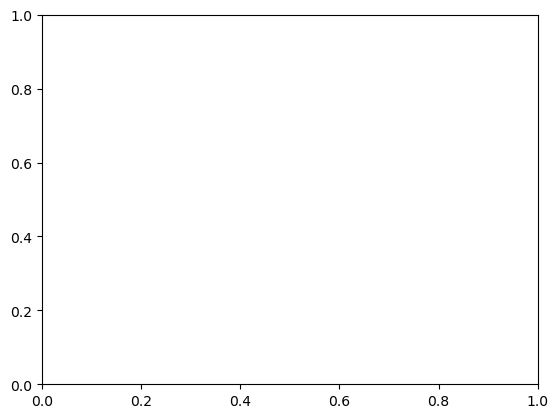

In [782]:
df.boxplot(column="environmental_satisfaction_level")

## Modificamos NaN por la mediana en "distance_from_home_km", "total_years_worked", "annual_salary"

**"distance_from_home_km" sustitución de nulos**

In [ ]:
# para ver el numero de veces que sale la mediana
mediana = df["distance_from_home_km"].median()
print(f"La mediana es {mediana}")
# Comprobamos si hay valores nulos en la variable "distance_from_home_km"
df["distance_from_home_km"].isnull().sum()

La mediana es 7.0


0

In [ ]:
# Sustituímos los valores nulos por la mediana
df["distance_from_home_km"] = df["distance_from_home_km"].fillna(mediana)


<Axes: >

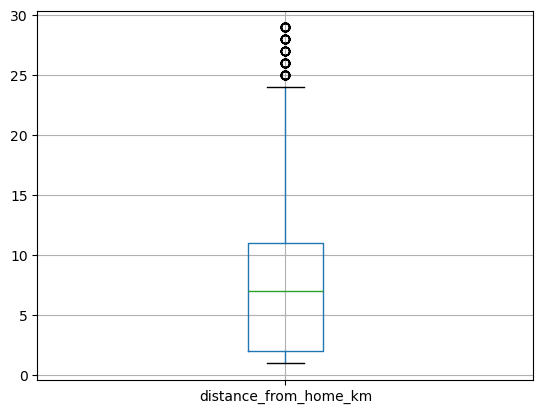

In [ ]:
df.boxplot(column="distance_from_home_km")

<Axes: >

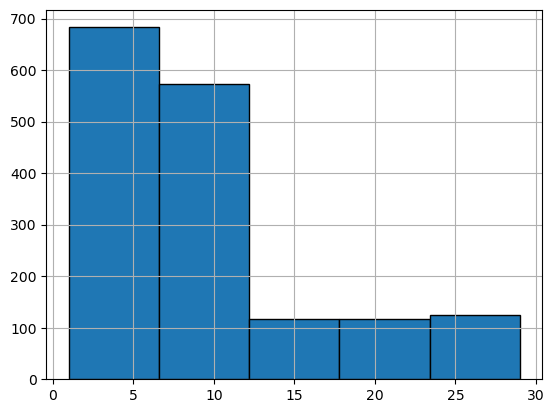

In [ ]:
df["distance_from_home_km"].hist(bins=5, edgecolor='black')

**"total_years_worked" sustitución de nulos**

In [ ]:
mediana = df["total_years_worked"].median()
print(f"La mediana es {mediana}")
# Comprobamos si hay valores nulos en la variable "distance_from_home_km"
df["total_years_worked"].isnull().sum()

La mediana es 10.0


0

In [ ]:
df["total_years_worked"] = df["total_years_worked"].fillna(mediana)

<Axes: >

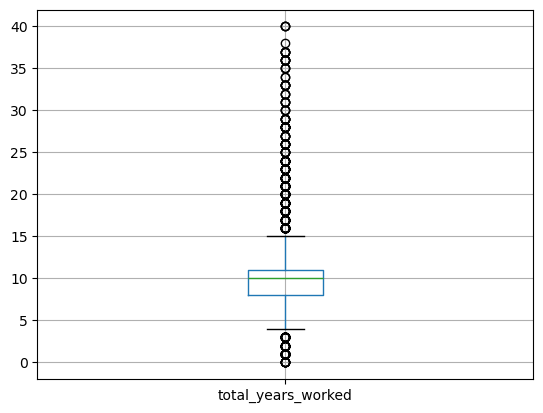

In [ ]:
df.boxplot(column="total_years_worked")

<Axes: >

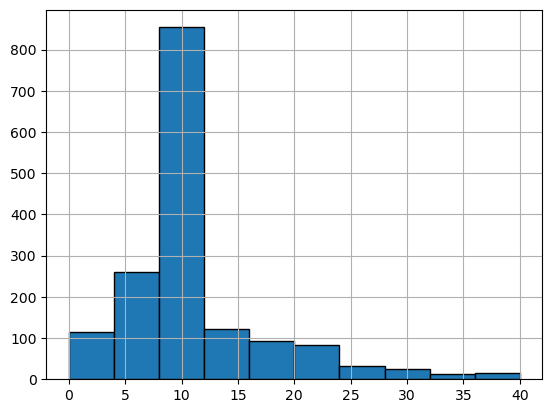

In [ ]:
df["total_years_worked"].hist(edgecolor='black')

**"annual_salary" sustitución de nulos**

In [ ]:
mediana = df["annual_salary"].median()
print(f"La mediana es {mediana}")
# Comprobamos si hay valores nulos en la variable "distance_from_home_km"
df["annual_salary"].isnull().sum()

La mediana es 53914.11


0

In [ ]:
df["annual_salary"] = df["annual_salary"].fillna(mediana)

<Axes: >

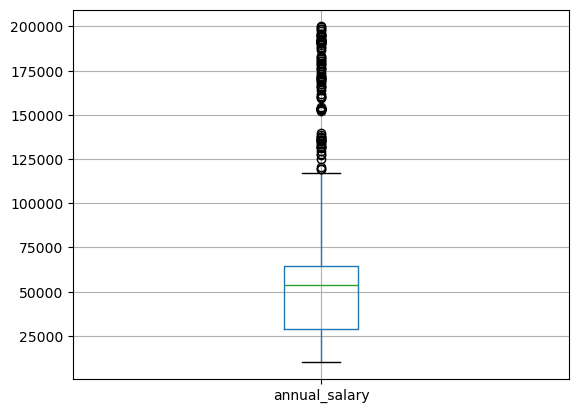

In [ ]:
df.boxplot(column="annual_salary")

<Axes: >

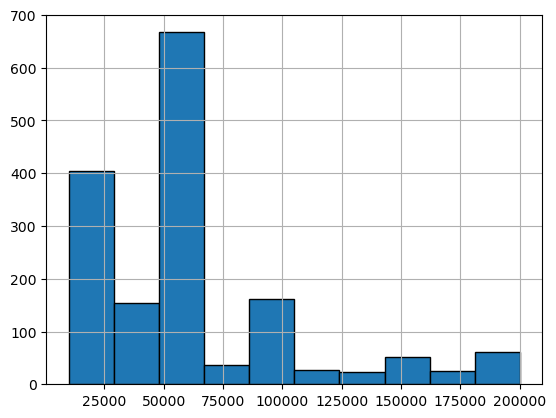

In [ ]:
df["annual_salary"].hist(edgecolor='black')

# DATAFRAME LIMPIO SIN NULOS, CORREGIDO

In [ ]:
df.isnull().sum().sort_values(ascending=False)
# Comprobamos si hay valores nulos en el dataframe

employee_id                         0
employee_turnover                   0
annual_salary                       0
total_years_worked                  0
remote_work                         0
birth_year                          0
years_with_current_manager          0
years_at_company                    0
training_sessions_last_year         0
stock_option_level                  0
standard_work_hours                 0
percent_salary_hike                 0
overtime_hours                      0
num_companies_worked                0
marital_status                      0
job_satisfaction_level              0
job_level                           0
job_involvement_level               0
gender                              0
environmental_satisfaction_level    0
education_level                     0
distance_from_home_km               0
business_travel_frequency           0
work_life_balance                   0
dtype: int64

In [ ]:
df.duplicated().sum()
# Comprobamos si hay filas duplicadas en el dataframe

0

In [ ]:
df.tail()

,employee_id,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
1609,1610,yes,travel_rarely,3.0,1,3.0,female,2,3,4,married,1,none,11,full_time,1,6,16,7,1987,no,10.0,103250.00,3.0
1610,1611,no,non_travel,4.0,2,3.0,female,3,2,2,unknown,1,none,12,part_time,0,5,9,8,1978,yes,10.0,44470.00,2.0
1611,1612,no,travel_rarely,7.0,5,3.0,female,4,3,3,single,0,no,18,part_time,0,3,8,7,1984,yes,9.0,100071.84,3.0
1612,1613,no,non_travel,8.0,4,1.0,female,3,2,4,divorced,4,no,13,part_time,2,3,7,7,1987,yes,12.0,53914.11,3.0
1613,1614,no,unknown,7.0,2,4.0,female,3,3,3,unknown,6,none,13,full_time,1,3,8,7,1977,no,10.0,108450.00,3.0
